In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns',False)

In [2]:
df = pd.read_pickle('/data/fast1/glacierml/models/LOO/rgi_est_raw.pkl')
cols = []
for i in range(273):
    cols.append(i)
X = np.mean(df[cols], axis = 1)
se = np.std(df[cols], axis = 1) / np.sqrt(len(cols))
df['LCI'] = X - (1.96 * se)
df['UCI'] = X + (1.96 * se)

df['VLCI'] = df['LCI'] / 1e3 * df['Area'] / 1e3
df['VUCI'] = df['UCI'] / 1e3 * df['Area'] / 1e3

/tmp/ipykernel_2588146/650060807.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['LCI'] = X - (1.96 * se)
/tmp/ipykernel_2588146/650060807.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['UCI'] = X + (1.96 * se)
/tmp/ipykernel_2588146/650060807.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame

In [3]:
vols = [[],[]]
for reg in df['region'].unique():
    dft = df[df['region'] == reg]
    vol = np.round((sum(dft['VUCI']) + sum(dft['VLCI'])) / 2, 3)
    err = np.round(sum(dft['VUCI']) - sum(dft['VLCI']), 3)
    vols[0].append(vol)    
    vols[1].append(err)

In [4]:
df_errors = pd.DataFrame({
    'Model':['FP', 'FE',
             'MP2', 'MP1', 'MT1', 'MT2',
            ],
    'RGI region 01':[18.98, 4.92 , 0   , 0   , '*' , '*' ],
    'RGI region 02':[1.06 , 0.27 , 0   , 0   , '*' , '*' ],
    'RGI region 03':[28.33, 7.35 , 25.4, 7.2 , 25.4, 7.2 ],
    'RGI region 04':[8.61 , 2.23 , 7.0 , 2.1 , 7.0 , 2.1 ],
    'RGI region 05':[15.69, 4.07 , 11.8, 3.7 , 11.8, 3.7 ],
    'RGI region 06':[3.77 , 0.98 , 3.7 , 0.9 , 3.7 , 0.9 ],
    'RGI region 07':[7.47 , 1.94 , 7.0 , 2.3 , 7.0 , 2.3 ],
    'RGI region 08':[0.30 , 0.08 , 0.29, 0.1 , 0.29, 0.1 ],
    'RGI region 09':[14.64, 3.80 , 15.5, 3.9 , 15.5, 3.9 ],
    'RGI region 10':[0.14 , 0.04 , 0.09, 0.05, 0.09, 0.05],
    'RGI region 11':[0.13 , 0.03 , 0.12, 0.05, 0.12, 0.05],
    'RGI region 12':[0.06 , 0.02 , 0.06, 0.03, 0.06, 0.03],
    'RGI region 13':[3.27 , 0.85 , 0   , 0   , '*' , '*' ],
    'RGI region 14':[2.87 , 0.74 , 0   , 0   , '*' , '*' ],
    'RGI region 15':[0.88 , 0.23 , 0   , 0   , '*' , '*' ],
    'RGI region 16':[0.10 , 0.03 , 0.07, 0.04, 0.07, 0.04],
    'RGI region 17':[5.34 , 1.39 , 5.9 , 1.6 , 5.9 , 1.6 ],
    'RGI region 18':[0.07 , 0.02 , 0.07, 0.03, 0.07, 0.03],
    'RGI region 19':[46.47, 12.06, 35.1, 9.1 , 35.1, 9.1 ],
})


df_errors = df_errors.T
# df_errors = df_errors.reset_index()

df_errors.columns = df_errors.iloc[0].values
# df_errors = df_errors.drop(0)
# df_errors.columns = df_errors.iloc[0].values
df_errors = df_errors.drop('Model')
df_errors = df_errors.reset_index()
df_errors = pd.concat([df_errors,pd.Series(vols[0],name = 'TSV')],axis = 1)
df_errors = pd.concat([df_errors,pd.Series(vols[1],name = 'TSE')],axis = 1)
df_errors

,index,FP,FE,MP2,MP1,MT1,MT2,TSV,TSE
0,RGI region 01,18.98,4.92,0,0,*,*,19.914,0.198
1,RGI region 02,1.06,0.27,0,0,*,*,0.834,0.010
2,RGI region 03,28.33,7.35,25.4,7.2,25.4,7.2,21.596,0.199
3,RGI region 04,8.61,2.23,7.0,2.1,7.0,2.1,5.296,0.050
4,RGI region 05,15.69,4.07,11.8,3.7,11.8,3.7,25.213,0.328
5,RGI region 06,3.77,0.98,3.7,0.9,3.7,0.9,2.378,0.020
6,RGI region 07,7.47,1.94,7.0,2.3,7.0,2.3,5.494,0.038
7,RGI region 08,0.3,0.08,0.29,0.1,0.29,0.1,0.184,0.001
8,RGI region 09,14.64,3.8,15.5,3.9,15.5,3.9,7.876,0.066
9,RGI region 10,0.14,0.04,0.09,0.05,0.09,0.05,0.162,0.002


In [5]:
df_errors_text = df_errors.copy()
df_errors_text = df_errors_text.reset_index()

100%|██████████| 95/95 [00:00<00:00, 52769.02it/s]
19it [00:00, 2985.27it/s]
19it [00:00, 30.39it/s]


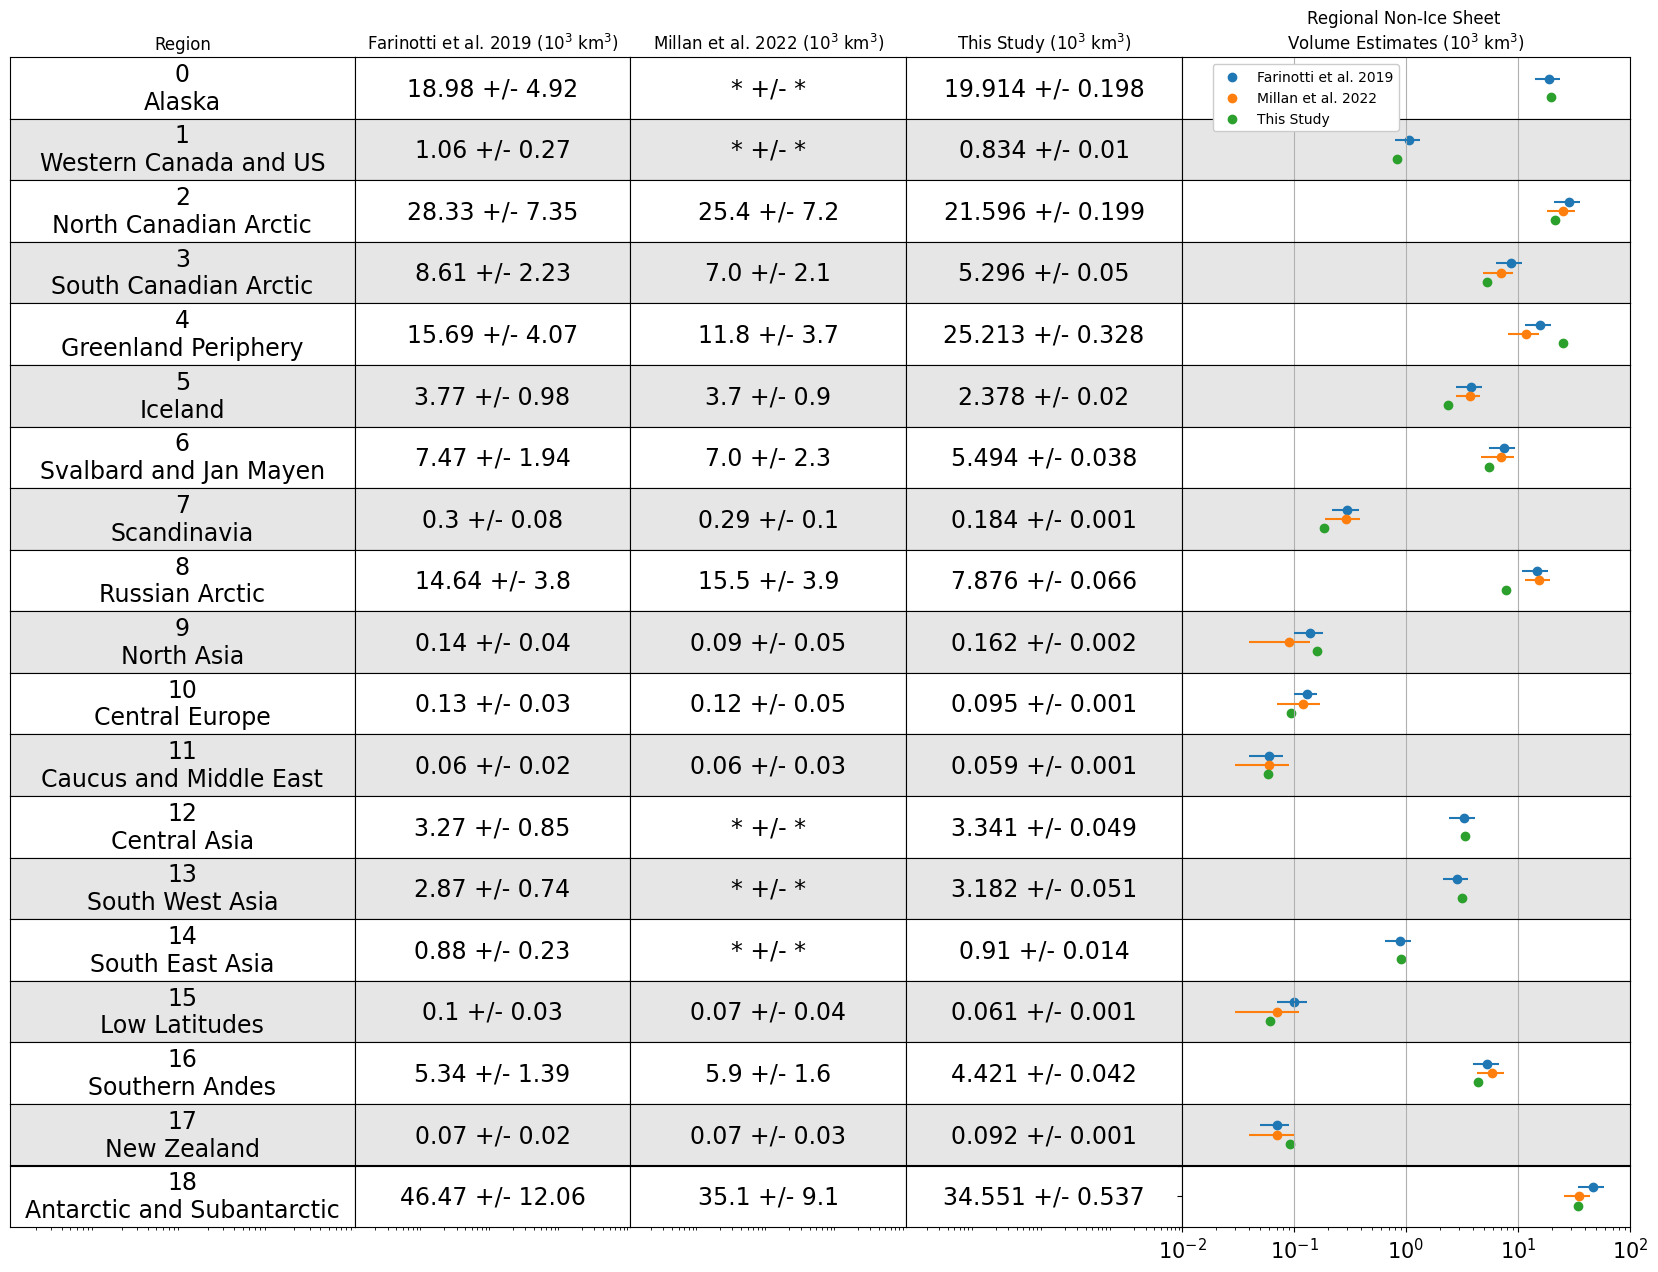

In [6]:
import pylab
col1 = df_errors_text.index

fig, axes = plt.subplots(
    ncols=5, nrows=19, figsize=(18,13),
    gridspec_kw={"width_ratios":[5,4,4,4,6.5]},
    sharex = True, sharey = True,
#     facecolor = '0.8'
                        )
fig.subplots_adjust(.05, 0.05, .95 , 0.95, wspace=0.0001, hspace=0.0001)
    
for ax in tqdm((axes.flatten()[:-1])):
    ax.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
    ax.ticklabel_format(useOffset=False, style="plain")
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    
for ax in tqdm((axes.flatten())):

    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')

#     for _, s in ax.spines.items():
#         s.set_visible(False)
#         ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
        

# border = fig.add_subplot(111)
# border.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
# border.set_facecolor("None")

text_kw = dict(ha = 'center', va = 'bottom', size=17)

region_list = [
    'Alaska',
    'Western Canada and US',
    'North Canadian Arctic',
    'South Canadian Arctic',
    'Greenland Periphery',
    'Iceland',
    'Svalbard and Jan Mayen',
    'Scandinavia',
    'Russian Arctic',
    'North Asia',
    'Central Europe',
    'Caucus and Middle East',
    'Central Asia',
    'South West Asia',
    'South East Asia',
    'Low Latitudes',
    'Southern Andes',
    'New Zealand',
    'Antarctic and Subantarctic'
]
for i, ax in tqdm(enumerate(axes[:,0])):
#     print(i)
    ax.text(
        0.5,
        0.08, 
        str(col1[i]) + '\n' + region_list[i], 
        transform = ax.transAxes, 
        **text_kw
    )
    
    ax.grid(visible = False)
    
# estimate and error
for i, ax in enumerate(axes[:,1]):
        
    ax.text(
        0.5,
        0.3, 
        str(
            df_errors_text['FP'].loc[col1[i]]) + ' +/- ' + str(
            df_errors_text['FE'].loc[col1[i]] ),
        transform = ax.transAxes, 
        **text_kw
    )
    ax.grid(visible = False)
for i, ax in enumerate(axes[:,2]):
        
    ax.text(
        0.5,
        0.3, 
        str(
            df_errors_text['MT1'].loc[col1[i]]) + ' +/- ' + str(
            df_errors_text['MT2'].loc[col1[i]] ),
        transform = ax.transAxes, 
        **text_kw
    )
    ax.grid(visible = False)
for i, ax in enumerate(axes[:,3]):
        
    ax.text(
        0.5,
        0.3, 
        str(
            df_errors_text['TSV'].loc[col1[i]]) + ' +/- ' + str(
            df_errors_text['TSE'].loc[col1[i]] ) ,
        transform = ax.transAxes, 
        **text_kw
    )
    ax.grid(visible = False)
        
#         if n % 2 != 0:
#             ax.set_facecolor('0.8')

labels = [
    'Farinotti et al. 2019',
    'Millan et al. 2022',
    'This Study'
]

# colors = ['C0', 'C1', 'C2']

for i, ax in tqdm(enumerate(axes[:,4])):
    #farinoitt est & errors
    x_f = df_errors['FP'].loc[col1[i]]
    x_f_err = df_errors['FE'].loc[col1[i]]
    
    
    # Millan est & errors
    x_m = df_errors['MP2'].loc[col1[i]]
    
    x_m_err = df_errors['MP1'].loc[col1[i]]
    # Edasi est & errors
    x_e = df_errors['TSV'].loc[col1[i]]
    x_e_err = df_errors['TSE'].loc[col1[i]]
    

    ax.scatter(
        x = x_f, 
        y = 1.5,
        c = 'C0',
#         marker = '.',
        alpha = 1,
        label = 'Farinotti et al. 2019'
    )
    ax.scatter(
        x =  x_m, 
        y = 0,
        c = 'C1',
#         marker = '.',
        alpha = 1,
        label = 'Millan et al. 2022'
    )
    ax.scatter(
        x =  x_e, 
        y = -1.5,
        c = 'C2',
#         marker = '.',
        alpha = 1,
        label = 'This Study'
    )

    ax.errorbar(
        x = x_f,
        y =  1.5,
        ecolor = 'C0',
#         elinewidth = 0.5,
        xerr = x_f_err,
    )
    ax.errorbar(
        x = x_m ,
        y = 0,
        ecolor = 'C1',
#         elinewidth = 0.5,
        xerr = x_m_err,
    )
    ax.errorbar(
        x = x_e ,
        y = -1.5,
        ecolor = 'C2',
#         elinewidth = 0.5,
        xerr = x_e_err,
    )
    ax.set_xlim((0.01,100))
    ax.set_ylim((-5,5))
    ax.set_xscale('log')
    grid_kw = dict(color = 'black')
#     plt.grid(b=None)

    ax.grid(visible = False,
#             **grid_kw
           )
    ax.xaxis.grid(visible = True)
#     break

# for i, ax in tqdm(enumerate(axes[0,:])):
#     ax.set_title(df_errors['Model'].loc[i])
axes[0,0].set_title(f'Region', fontsize = 12,
#                    fontweight = 1000
                   )
axes[0,1].set_title(f'Farinotti et al. 2019 (10$^3$ km$^3$)', fontsize = 12,
#                    fontweight = 1000
                   )
# axes[0,2].set_title('Farinotti\nError')
axes[0,2].set_title(f'Millan et al. 2022 (10$^3$ km$^3$)', fontsize = 12,
#                    fontweight = 1000
                   )
# axes[0,4].set_title('Millan\nError')
axes[0,3].set_title(f'This Study (10$^3$ km$^3$)', fontsize = 12,
#                    fontweight = 1000
                   )
# axes[0,6].set_title('Edasi\nError')
axes[0,4].set_title(f'Regional Non-Ice Sheet \nVolume Estimates (10$^3$ km$^3$)',
                    fontsize = 12, 
#                     fontweight = 1000
                   )
plt.xticks(fontsize = 15)


for n in range(0, 19, 1):
    if n % 2 != 0:
        axes[n,0].set_facecolor('0.9')
        axes[n,1].set_facecolor('0.9')
        axes[n,2].set_facecolor('0.9')
        axes[n,3].set_facecolor('0.9')
        axes[n,4].set_facecolor('0.9')
#         axes[n,5].set_facecolor('0.8')
#         axes[n,6].set_facecolor('0.8')
#         axes[n,7].set_facecolor('0.8')

ax.legend(
    labels,
    facecolor = '1',
    framealpha = 1,
    frameon = True,
    bbox_to_anchor=(0.5,19),
)
fig.patch.set_facecolor('w')

# plt.tight_layout()
# plt.subplots_adjust(top = 1)
# plt.show()
# plt.savefig('figs/scatter/scatter_table_df8.eps')
# plt.savefig('figs/scatter/scatter_table_df8.svg')